In [1]:
from copy import copy,deepcopy 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from Path import *
from CustomKnot import *
from KnotDatabase import *
from KnotStar import *
from random import *
from KnotGA import *
from KnotAnt import *
np.set_printoptions(threshold=np.inf,linewidth=np.inf,nanstr="n")
pd.options.display.max_colwidth = 100


In [14]:
masterDb = pd.read_csv("databases/master.csv")
masterDb = masterDb[masterDb.name == '3_1']

masterDb = masterDb[masterDb.numberOfStrands < 12]
masterDb

,Unnamed: 0,name,crosses,numberOfStrands
42,42,3_1,"[X(1,4,6,3), X(2,5,3,6), X(4,1,5,2)]",6
43,43,3_1,"[X(1,4,2,5), X(2,7,3,8), X(5,8,6,1), X(6,3,7,4)]",8


In [2]:

list_3_1 = [CustomKnot(crosses) for crosses in  masterDb.crosses]
shuffle(list_3_1)
knot_3_1_1 = list_3_1.pop()
knot_3_1_2 = list_3_1.pop()

print(knot_3_1_1.crosses)
print(knot_3_1_2.crosses)
difference(knot_3_1_1,knot_3_1_2)

NameError: name 'masterDb' is not defined

In [5]:
print(areSameKnotsAStar2(knot_3_1_1,knot_3_1_2,timeLimit=60))

(True, ['createALoop(1,1)'], ['reidemeisterIII(2,5,8,check=False)'])


In [8]:
db = singleDatabase(10)

In [9]:
for index, row in db.iterrows():
    print(row["name"])
    knot = CustomKnot(deepcopy(row["crosses"]))
    node = NodeKnot(knot)
    print(len(node.successorsList(100)))

0_1
0
3_1
60
4_1
88
5_1
140
5_2
124
6_1
168
6_2
160
6_3
152
7_1
252
7_2
220
7_3
204
7_4
204
7_5
188
7_6
192
7_7
188
8_1
280
8_2
264
8_3
248
8_4
256
8_5
248
8_6
232
8_7
240
8_8
240
8_9
232
8_10
232
8_11
224
8_12
224
8_13
232
8_14
228
8_15
224
8_16
220
8_17
216
8_18
208
8_19
233
8_20
225
8_21
225
9_1
396
9_2
348
9_3
316
9_4
300
9_5
316
9_6
284
9_7
284
9_8
296
9_9
268
9_10
268
9_11
284
9_12
280
9_13
268
9_14
284
9_15
268
9_16
276
9_17
284
9_18
252
9_19
276
9_20
272
9_21
260
9_22
268
9_23
264
9_24
264
9_25
268
9_26
268
9_27
256
9_28
264
9_29
260
9_30
256
9_31
264
9_32
252
9_33
252
9_34
244
9_35
300
9_36
276
9_37
268
9_38
252
9_39
256
9_40
240
9_41
264
9_42
269
9_43
256
9_44
256
9_45
256
9_46
269
9_47
245
9_48
269
9_49
267
10_1
424
10_2
400
10_3
360
10_4
384
10_5
360
10_6
328
10_7
320
10_8
376
10_9
336
10_10
344
10_11
312
10_12
328
10_13
320
10_14
324
10_15
340
10_16
320
10_17
328
10_18
308
10_19
336
10_20
344
10_21
328
10_22
320
10_23
320
10_24
296
10_25
288
10_26
296
10_27
296
10_28
336
1

In [1]:
from CustomKnot import *

k1 = CustomKnot([X(1,4,2,5), X(3,8,4,9), X(5,12,6,13), X(7,2,8,3), X(9,1,10,14), X(11,6,12,7), X(13,11,14,10)]) # 7_6
k2 = CustomKnot([X(1,10,2,11), X(1,19,22,20), X(4,15,5,16), X(6,14,7,13), X(7,2,8,3), X(8,21,9,22), X(12,4,13,3), X(14,17,15,18), X(16,5,17,6), X(18,12,19,11), X(20,9,21,10)]) # 7_6 newRandom 10000 simplificado

k2.reidemeisterIII(1,19,11,check=False)
k2.undoReidemeisterII(10,20)
k2.reidemeisterIII(7,11,3,check=False)
k2.reidemeisterIII(8,18,10,check=False)
k2.undoALoop(9)
k2.reidemeisterIII(10,2,14,check=False)
k2.createALoop(9,3)
k2.reidemeisterIII(11,17,9,check=False)
k2.reidemeisterIII(12,8,1,check=False)
k2.undoReidemeisterII(11,18)
k2.createALoop(9,2)
k2.reidemeisterIII(9,1,11,check=False)
k2.reidemeisterIII(2,10,16,check=False)
k2.undoALoop(1)

print(k2 == k1)

reidemeisterIII
reidemeisterIII
reidemeisterIII
reidemeisterIII
reidemeisterIII
reidemeisterIII
reidemeisterIII
reidemeisterIII
True


In [6]:
k1 = knotFromPyknotid("3_1")
k2 = deepcopy(k1)
k2.createALoop(5,3)
difference(k1,k2)

16.0

In [10]:
k1  = knotFromPyknotid("3_1")
k2 = deepcopy(k1)
k2.randomMovN(10000,20,percentage=True)

#k1 = CustomKnot([X(1,6,2,7), X(3,8,4,9), X(5,10,6,1), X(7,2,8,3), X(9,4,10,5)]) #5_1
#k2 = CustomKnot([X(1,8,18,7), X(2,2,3,1), X(3,14,4,15), X(5,10,6,11), X(8,15,9,16), X(9,4,10,5), X(12,12,13,11), X(13,6,14,7), X(17,16,18,17)])#5_1_random

#k1 = CustomKnot([X(1,4,2,5), X(3,6,4,1), X(5,2,6,3)]) #3_1
#k2 = CustomKnot([X(1,4,20,3), X(2,5,3,6), X(4,1,5,2), X(6,19,7,20), X(8,15,9,16), X(9,19,10,18), X(11,10,12,11), X(12,7,13,8), X(13,14,14,15), X(16,18,17,17)])

#k1 = CustomKnot([X(1,4,2,5), X(3,9,4,8), X(5,12,6,1), X(7,10,8,11), X(9,3,10,2), X(11,6,12,7)]) #6_1
#k2 = CustomKnot([X(1,4,18,3), X(1,9,2,8), X(4,17,5,18), X(7,12,8,13), X(9,3,10,2), X(10,5,11,6), X(11,15,12,14), X(13,6,14,7), X(16,15,17,16)])
# 
#6_1random

#k1 = CustomKnot([X(1,4,2,5), X(3,9,4,8), X(5,12,6,1), X(7,10,8,11), X(9,3,10,2), X(11,6,12,7)])#6_1
#k2 = CustomKnot([X(1,14,22,13), X(2,11,3,12), X(3,19,4,18), X(4,17,5,18), X(6,16,7,15), X(7,9,8,8), X(10,10,11,9), X(12,1,13,2), X(14,21,15,22), X(16,20,17,19), X(20,6,21,5)]) #6_1 random 5000


#k1 = CustomKnot([X(1,4,2,5), X(3,9,4,8), X(5,12,6,1), X(7,10,8,11), X(9,3,10,2), X(11,6,12,7)])  #6_1
#[X(1,6,18,5), X(3,11,4,10), X(6,17,7,18), X(7,12,8,13), X(8,9,9,10), X(11,3,12,2), X(14,13,15,14), X(15,4,16,5), X(16,2,17,1)] #6_1 random 100000
#k2 = CustomKnot([X(1,6,14,5), X(3,9,4,8), X(6,13,7,14), X(7,10,8,11), X(9,3,10,2), X(11,4,12,5), X(12,2,13,1)]) #6_1 random 100000 simplificado


#k1 = CustomKnot([X(1,4,2,5), X(3,9,4,8), X(5,12,6,1), X(7,10,8,11), X(9,3,10,2), X(11,6,12,7)]) #6_1
#[X(1,7,18,8), X(1,12,2,13), X(4,9,5,10), X(8,18,9,17), X(10,3,11,4), X(13,6,14,7), X(14,6,15,5), X(15,2,16,3), X(16,12,17,11)] #6_1  random 1000000
#k2 = CustomKnot([X(1,5,14,6), X(1,10,2,11), X(4,7,5,8), X(6,14,7,13), X(8,3,9,4), X(11,2,12,3), X(12,10,13,9)]) #6_1  random 1000000 simplificado
k5_1_1 = CustomKnot([X(1, 8, 2, 9), X(2, 11, 3, 12), X(4, 14, 5, 13), X(5, 18, 6, 1), X(6, 15, 7, 16), X(9, 12, 10, 13), X(10, 3, 11, 4), X(14, 17, 15, 18), X(16, 7, 17, 8)])
k5_1_2 = CustomKnot([X(1, 8, 32, 7), X(1, 20, 2, 21), X(3, 22, 4, 23), X(5, 25, 6, 24), X(8, 27, 9, 28), X(12, 31, 13, 32), X(14, 10, 15,9), X(15, 29, 16, 28), X(16, 11, 17, 12), X(17, 30, 18, 31), X(18, 14, 19, 13), X(19, 6, 20, 7), X(21, 2, 22, 3), X(25, 5, 26, 4), X(26, 24, 27, 23), X(29, 10, 30, 11)])

#k1 = CustomKnot([X(1,8,2,9), X(3,10,4,11), X(5,12,6,13), X(7,14,8,1), X(9,2,10,3), X(11,4,12,5), X(13,6,14,7)]) #7_1
#[X(1,12,2,13), X(3,18,4,19), X(4,7,5,8), X(6,17,7,18), X(11,20,12,1), X(13,2,14,3), X(14,10,15,9), X(15,8,16,9), X(16,5,17,6), X(19,10,20,11)] #7_1 random 10000
#k2 = CustomKnot([X(1,10,2,11), X(3,14,4,15), X(4,7,5,8), X(6,13,7,14), X(9,16,10,1), X(11,2,12,3), X(12,5,13,6), X(15,8,16,9)]) #7_1 random 10000 simplificado

#k1 = CustomKnot([X(1,8,2,9), X(3,10,4,11), X(5,12,6,13), X(7,14,8,1), X(9,2,10,3), X(11,4,12,5), X(13,6,14,7)])# 7_1
#k2 = CustomKnot([X(2,9,3,10), X(3,12,4,13), X(5,14,6,15), X(8,1,9,2), X(10,7,11,8), X(11,16,12,1), X(13,4,14,5), X(15,6,16,7)])# 7_1 newRandom 30 simplificado

#k1 = CustomKnot([X(1,8,2,9), X(3,10,4,11), X(5,12,6,13), X(7,14,8,1), X(9,2,10,3), X(11,4,12,5), X(13,6,14,7)]) # 7_1
#k2 = CustomKnot([X(1,10,2,11), X(4,11,5,12), X(5,2,6,3), X(7,14,8,15), X(9,16,10,1), X(12,3,13,4), X(13,6,14,7), X(15,8,16,9)])#7_1 newRandom 10000 simplificado

# Este tarda mucho:
#k1 = CustomKnot([X(1,4,2,5), X(3,8,4,9), X(5,12,6,13), X(7,2,8,3), X(9,1,10,14), X(11,6,12,7), X(13,11,14,10)]) # 7_6
#k2 = CustomKnot([X(1,10,2,11), X(1,19,22,20), X(4,15,5,16), X(6,14,7,13), X(7,2,8,3), X(8,21,9,22), X(12,4,13,3), X(14,17,15,18), X(16,5,17,6), X(18,12,19,11), X(20,9,21,10)]) # 7_6 newRandom 10000 simplificado



print(k1.crosses)
print(k2.crosses)
k2.reduceUnnecessaryMov()
print(k2.crosses)
print(k2==k1)


[X(1,4,2,5), X(3,6,4,1), X(5,2,6,3)]remaining: <1s                                 
[X(2,13,3,14), X(7,20,8,1), X(11,7,12,6), X(12,5,13,6), X(14,3,15,4), X(15,5,16,4), X(16,1,17,2), X(17,10,18,11), X(18,10,19,9), X(19,8,20,9)]
[X(2,5,3,6), X(3,8,4,1), X(6,1,7,2), X(7,4,8,5)]
False


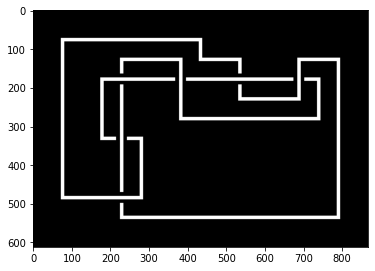

In [4]:


image = k1.image()
fig, ax = plt.subplots(figsize=(image.shape[0]//(51*2),image.shape[1]//(51*2)))
ax.imshow(image,cmap='gray')

In [50]:
k = CustomKnot([X(1,2,2,3),
          X(3,4,4,5),
          X(5,1,6,6)])
k.rotate(1)


k.createALoop(2,False)
k.createALoop(3,False)
k.createALoop(2,False)
k.createALoop(1,False)
k.createALoop(2,False)
k.createALoop(5,False)
k.createALoop(7,False)


print(k.createReidemeisterII(4,9,True))
print(k.createReidemeisterII(14,22,True))
print(k.createReidemeisterII(13,19,True))
print(k)

True
True
True
Cross: [X(1,15,32,16), X(3,2,4,3), X(6,1,7,2), X(8,7,9,8), X(10,9,11,10), X(11,5,12,4), X(12,5,13,6), X(19,18,20,19), X(21,15,22,14), X(22,13,23,14), X(24,23,25,24), X(25,20,26,21), X(26,27,27,28), X(28,18,29,17), X(29,16,30,17), X(30,31,31,32)]
Planar Diagrams:
[[21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21  0  0  0  0  0  0]
 [21 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 21  0  0  0  0  0  0]
 [21 15  6  6  6  0  0  0  0  0  0 22 22 22 22 22 15 21  0  0  0  0  0  0]
 [21 15  6 12 -2 13 13 13 13 13 13 -1 14 14 14 -1 15 21  0  0  0  0  0  0]
 [21 15  6 12  5  0  0  0  0  0  0 23  0  0  0 21 21 21  0  0  0  0  0  0]
 [21 15  6 12  5  0  0  0  0  0  0 23 23 23 23 23 23 23 23  0  0  0  0  0]
 [21 15  6 12  5  0  0  0  0 11 11 11 11 11 11 11 11 11 23  0  0  0  0  0]
 [21 15  6 12  5  0  0  0  0 11  8  8  0  0  0 10 10 11 23  0  0  0  0  0]
 [21 15  6 12 -2 11 11 11 11 11  8 -2  9  9  9 -1 10 11 23  0  0  0  0  0]
 [21 15  6  0  4  0  0  0  0  0  0  7  0  0  0 

True
True
True
True
True
True
True
True
True
True
True
True
True
True
Cross: [X(2,1,1,2)]
Planar Diagrams:
[[ 2  2  0]
 [ 2 -2  1]
 [ 0  1  1]]


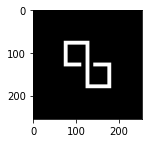

In [135]:
#k = Knot([
#  X(1,9,2,8),
  #X(2,8,1,9),
#  X(3,10,4,11), 
#  X(5,3,6,2),
#  X(7,1,8,12), 
#  X(9,4,10,5), 
#  X(11,7,12,6)])
#k = Knot([X(1,2,4,1),
#         X(2,3,3,4)])
#k = Knot([X(1,2,6,1),
#          X(4,5,5,6),
#          X(2,3,3,4)])
k = CustomKnot([X(1,2,2,3),
          X(3,4,4,5),
          X(5,1,6,6)])
k.rotate(1)


k.createALoop(2,False)
k.createALoop(3,False)
k.createALoop(2,False)
k.createALoop(1,False)
k.createALoop(2,False)
k.createALoop(5,False)
k.createALoop(7,False)


print(k.createReidemeisterII(4,9,True))
print(k.createReidemeisterII(14,22,True))
print(k.createReidemeisterII(13,19,True))

print(k.undoALoop(3))
print(k.undoALoop(29))
print(k.undoALoop(25))
print(k.undoALoop(22))
print(k.undoALoop(17))
print(k.undoALoop(8))
print(k.undoALoop(6))

print(k.undoReidemeisterII(2,5))
print(k.undoReidemeisterII(8,12))
print(k.undoReidemeisterII(6,10))
print(k.undoReidemeisterII(4,6))

print(k)

#print(k.planarDiagramZones())
image = k.image()
fig, ax = plt.subplots(figsize=(image.shape[0]//(51*2),image.shape[1]//(51*2)))
ax.imshow(image,cmap='gray')




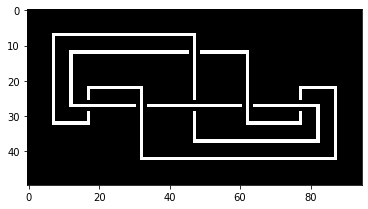

In [7]:
#Imagen ejemplo
knot = CustomKnot([X(1,9,2,8),X(3,10,4,11),X(5,3,6,2),X(7,1,8,12),X(9,4,10,5),X(11,7,12,6)])
image = knot.image()
fig, ax = plt.subplots()#figsize=(image.shape[0]//(51*2),image.shape[1]//(51*2)))
ax.imshow(image,cmap='gray')

<bound method CustomKnot.planarDiagrams of Cross: [X(1,5,2,4), X(1,9,12,10), X(5,10,6,11), X(7,3,8,2), X(8,3,9,4), X(11,6,12,7)]
Planar Diagrams:
[[ 0  0  0  0  0  9  9  9  9  9  9  9  9]
 [ 0  0  0  9  9  9  4  4  4  4  4  4  9]
 [ 0  9  9  9  4  4  4  8  8  8  8  4  9]
 [12 -2  1  1 -2  2  2 -1  3  3 -1  4  9]
 [12 10 10 10  5  0  0  7  0  0  9  9  9]
 [12  0  0 10  5  0  0  7  0  0  0  0  0]
 [12  0  0 10 -1 11  0  7  0  0  0  0  0]
 [12  0  0  0  6 11  0  7  0  0  0  0  0]
 [12  0  0  0  6 11  0  7  0  0  0  0  0]
 [12 12 12 12 -2 11  0  7  0  0  0  0  0]
 [ 0  0  0  0  7  7  7  7  0  0  0  0  0]]>


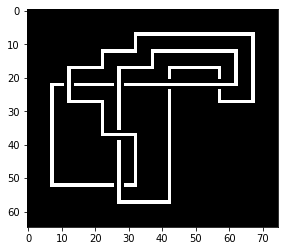

In [4]:
#Imagen ejemplo
knot = CustomKnot([X(1,9,2,8),X(1,3,12,4),X(9,4,10,5),X(5,10,6,11),X(11,6,12,7),X(8,2,7,3)])
# knot.createALoop(11,0)
# knot.createReidemeisterII(7,11,0)
knot.reidemeisterIII(1,4,9)
print(knot.planarDiagrams)
image = knot.image()
fig, ax = plt.subplots()#figsize=(image.shape[0]//(51*2),image.shape[1]//(51*2)))
ax.imshow(image,cmap='gray')